# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [4]:
import pandas as pd
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [6]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [7]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [8]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [10]:
X = data.drop(['MEDV'], axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [12]:
# Building the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting with the model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [14]:
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

print(f"R-squared for training test: {r2_train:.4f}")
print(f"R-squared for test test: {r2_test:.4f}")

R-squared for training test: 0.7509
R-squared for test test: 0.6688


## 4. Calculate and print mean squared error for both the training and the testing set.

In [16]:
mse_train = mean_squared_error(y_train, train_predictions)
mse_test = mean_squared_error(y_test, test_predictions)

print(f"MSE for training test: {mse_train:.4f}")
print(f"MSE for test test: {mse_test:.4f}")

MSE for training test: 21.6414
MSE for test test: 24.2911


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [18]:
mae_train = mean_absolute_error(y_train, train_predictions)
mae_test = mean_absolute_error(y_test, test_predictions)

print(f"MAE for training test: {mae_train:.4f}")
print(f"MAE for test test: {mae_test:.4f}")

MAE for training test: 3.3148
MAE for test test: 3.1891


## Classification Model Evaluation

In [20]:
from sklearn.datasets import load_iris
data = load_iris()

In [21]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [22]:
column_names = data.feature_names

In [23]:
df = pd.DataFrame(data['data'],columns=column_names)

In [24]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
target = pd.DataFrame(data.target)

In [26]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [27]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Generar predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [33]:
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Performance:")
print(f"Accuracy: {train_accuracy:.4f}")

print("\nTesting Performance:")
print(f"Accuracy: {test_accuracy:.4f}")

Training Performance:
Accuracy: 0.9750

Testing Performance:
Accuracy: 1.0000


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [35]:
train_balanced_accuracy = balanced_accuracy_score(y_train, train_predictions)
test_balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

print(f"Balanced Accuracy: {train_balanced_accuracy:.4f}")
print(f"Balanced Accuracy: {test_balanced_accuracy:.4f}")

Balanced Accuracy: 0.9756
Balanced Accuracy: 1.0000


## 10. Calculate and print the precision score for both the training and the testing set.

In [37]:
train_precision = precision_score(y_train, train_predictions, average='weighted')
test_precision = precision_score(y_test, test_predictions, average='weighted')

print("Training Performance:")
print(f"Precision: {train_precision:.4f}")

print("\nTesting Performance:")
print(f"Precision: {test_precision:.4f}")

Training Performance:
Precision: 0.9768

Testing Performance:
Precision: 1.0000


## 11. Calculate and print the recall score for both the training and the testing set.

In [39]:
train_recall = recall_score(y_train, train_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')

print("Training Performance:")
print(f"Recall: {train_recall:.4f}")

print("\nTesting Performance:")
print(f"Recall: {test_recall:.4f}")

Training Performance:
Recall: 0.9750

Testing Performance:
Recall: 1.0000


## 12. Calculate and print the F1 score for both the training and the testing set.

In [41]:
train_f1 = f1_score(y_train, train_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

print("Training Performance:")
print(f"F1 Score: {train_f1:.4f}")

print("\nTesting Performance:")
print(f"F1 Score: {test_f1:.4f}")

Training Performance:
F1 Score: 0.9750

Testing Performance:
F1 Score: 1.0000


## 13. Generate confusion matrices for both the training and the testing set.

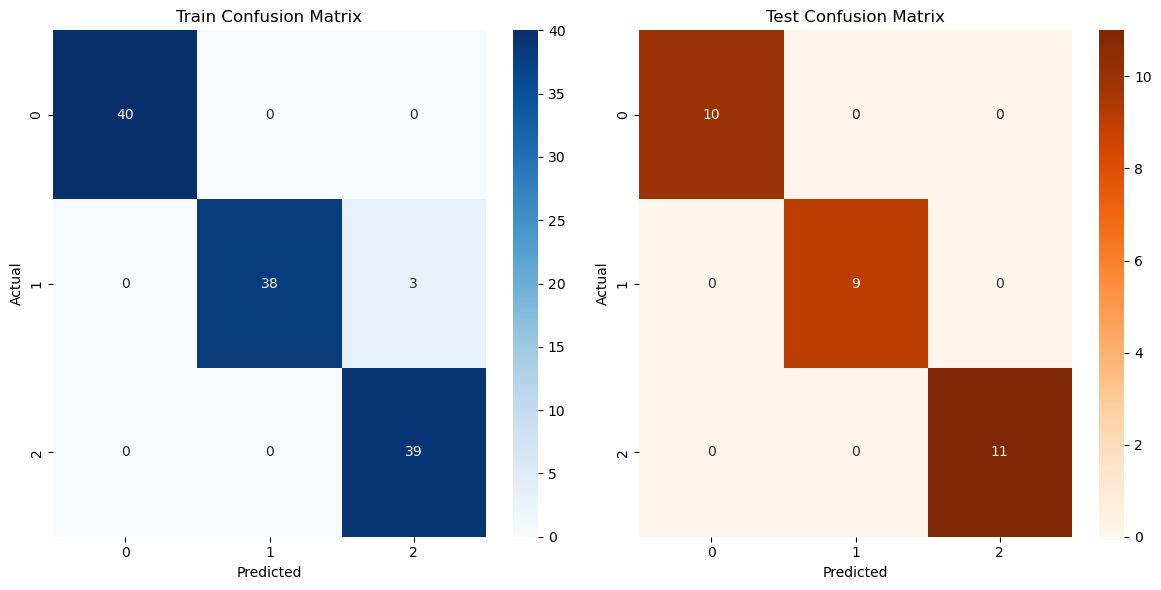

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

train_cm = confusion_matrix(y_train, train_predictions)
test_cm = confusion_matrix(y_test, test_predictions)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Train Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(test_cm, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("Test Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Define the models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel="linear")
}

# DataFrame to store results
results = []

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append metrics to results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Balanced Accuracy": balanced_acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(results_df)

                    Model  Accuracy  Balanced Accuracy  Precision  Recall  \
0           Decision Tree       1.0                1.0        1.0     1.0   
1           Random Forest       1.0                1.0        1.0     1.0   
2     K-Nearest Neighbors       1.0                1.0        1.0     1.0   
3  Support Vector Machine       1.0                1.0        1.0     1.0   

   F1 Score  
0       1.0  
1       1.0  
2       1.0  
3       1.0  


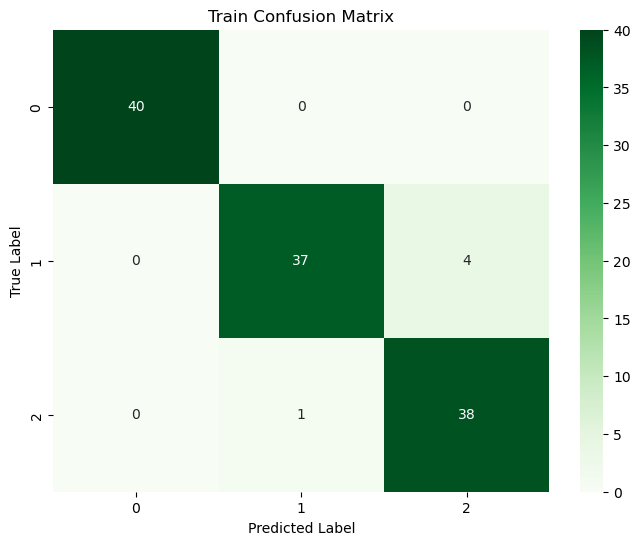

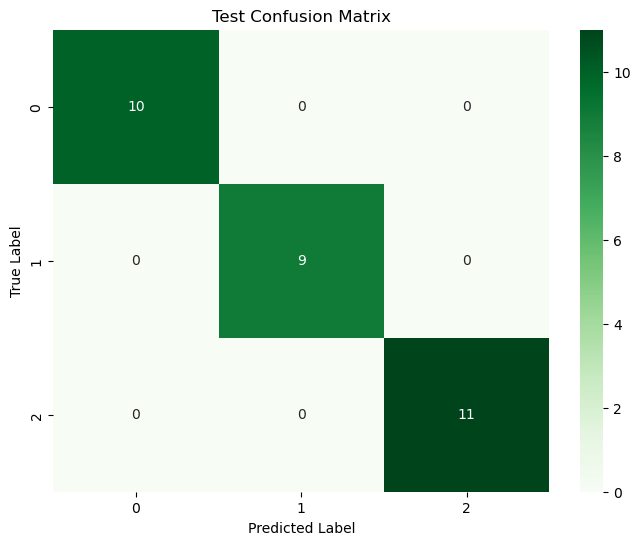

In [137]:
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

# Calculate confusion matrices
train_conf_matrix = confusion_matrix(y_train, train_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Assume label_names contains the class labels
label_names = sorted(set(y_train))

# Plot train confusion matrix
plot_confusion_matrix(train_conf_matrix, 'Train Confusion Matrix', label_names)

# Plot test confusion matrix
plot_confusion_matrix(test_conf_matrix, 'Test Confusion Matrix', label_names)